In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
import keras_tuner
import keras


# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [2]:
pd.read_csv("UNSW-NB15_LIST_EVENTS.csv")

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245
...,...,...,...
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174


In [3]:
nb_features = pd.read_csv("NUSW-NB15_features.csv", encoding='cp1252')
un1 = pd.read_csv("UNSW-NB15_1.csv")
un2 = pd.read_csv("UNSW-NB15_2.csv")
un3 = pd.read_csv("UNSW-NB15_3.csv")
un4 = pd.read_csv("UNSW-NB15_4.csv")
test_set = pd.read_csv("UNSW_NB15_testing-set.csv")
train_set = pd.read_csv("UNSW_NB15_training-set.csv")
event_list = pd.read_csv("UNSW-NB15_LIST_EVENTS.csv")

In [4]:
nb_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [5]:
un1.columns = nb_features['Name']
un2.columns = nb_features['Name']
un3.columns = nb_features['Name']
un4.columns = nb_features['Name']

In [6]:
train_df = pd.concat([un1,un2,un3,un4],ignore_index=True)
train_df = train_df.sample(frac=1,random_state = 42).reset_index(drop=True)
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,NaN,NaN,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,37,37,26,26,26,13,37,Generic,1


In [7]:
train_df.shape

(2540043, 49)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [9]:
print("duplicates in train_df: ",train_df.duplicated().sum())

duplicates in train_df:  480626


In [10]:
train_df.drop_duplicates()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,0.031870,7820,15060,31,29,30,32,-,1.946909e+06,3.750486e+06,122,126,255,255,1419799572,3566126516,64,120,0,0,17.059750,14.605255,1424235269,1424235269,0.286682,0.250768,0.000662,0.000521,0.000141,0,0,NaN,NaN,,5,6,1,4,1,1,1,NaN,0
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,0.035147,528,304,31,29,0,0,-,9.013572e+04,5.189632e+04,4,4,0,0,0,0,132,76,0,0,9.409706,10.879310,1421957338,1421957338,6.662667,7.699333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,11,4,3,7,1,1,1,NaN,0
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,NaN,0


In [11]:
train_df.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [12]:
train_df['attack_cat'].fillna('Not attacked',inplace=True)
train_df['ct_flw_http_mthd'].fillna(0,inplace=True)
train_df['is_ftp_login'].fillna(0, inplace=True)
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0.0,,10,8,4,5,3,1,7,Not attacked,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0.0,,14,6,8,12,5,1,6,Not attacked,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,Not attacked,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0.0,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0.0,,2,2,5,4,1,1,1,Not attacked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,Not attacked,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0.0,,1,1,2,6,1,1,1,Not attacked,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,0.0,0.0,,12,11,8,9,6,1,6,Not attacked,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0.0,,37,37,26,26,26,13,37,Generic,1


In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
dur,2540043.0,6.587925e-01,1.392494e+01,0.000000e+00,1.037000e-03,1.586100e-02,2.145650e-01,8.786638e+03
sbytes,2540043.0,4.339589e+03,5.640604e+04,0.000000e+00,2.000000e+02,1.470000e+03,3.182000e+03,1.435577e+07
dbytes,2540043.0,3.642760e+04,1.610962e+05,0.000000e+00,1.780000e+02,1.820000e+03,1.489400e+04,1.465753e+07
sttl,2540043.0,6.278202e+01,7.462281e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2540043.0,3.076681e+01,4.285092e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2540043.0,5.163917e+00,2.251709e+01,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00,5.319000e+03
dloss,2540043.0,1.632944e+01,5.659479e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,5.507000e+03
Sload,2540043.0,3.695650e+07,1.186044e+08,0.000000e+00,1.353955e+05,5.893038e+05,2.039923e+06,5.988000e+09
Dload,2540043.0,2.450860e+06,4.224865e+06,0.000000e+00,1.191580e+04,5.893179e+05,2.925945e+06,1.287619e+08


In [14]:
# train_df.describe(include=" ").T

In [15]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')
train_df['ct_ftp_cmd'].dtype

dtype('O')

In [16]:
train_df['ct_ftp_cmd'].unique()

array([' ', '0', '1', '2', '4', '5', '3', '6', '8'], dtype=object)

In [17]:
train_df['ct_ftp_cmd']=train_df['ct_ftp_cmd'].replace(' ','0')

In [18]:
train_df['ct_ftp_cmd']=train_df['ct_ftp_cmd'].astype('int')

In [19]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

column = 'is_ftp_login'
convert_to_binary(train_df, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,Not attacked,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,Not attacked,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,Not attacked,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,Not attacked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0,0,3,10,4,1,1,1,1,Not attacked,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,1,1,2,6,1,1,1,Not attacked,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,0.0,0,0,12,11,8,9,6,1,6,Not attacked,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,37,37,26,26,26,13,37,Generic,1


In [20]:
#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')
# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')
# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

**Exploratory Data Analysis (EDA)**

In [21]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

39

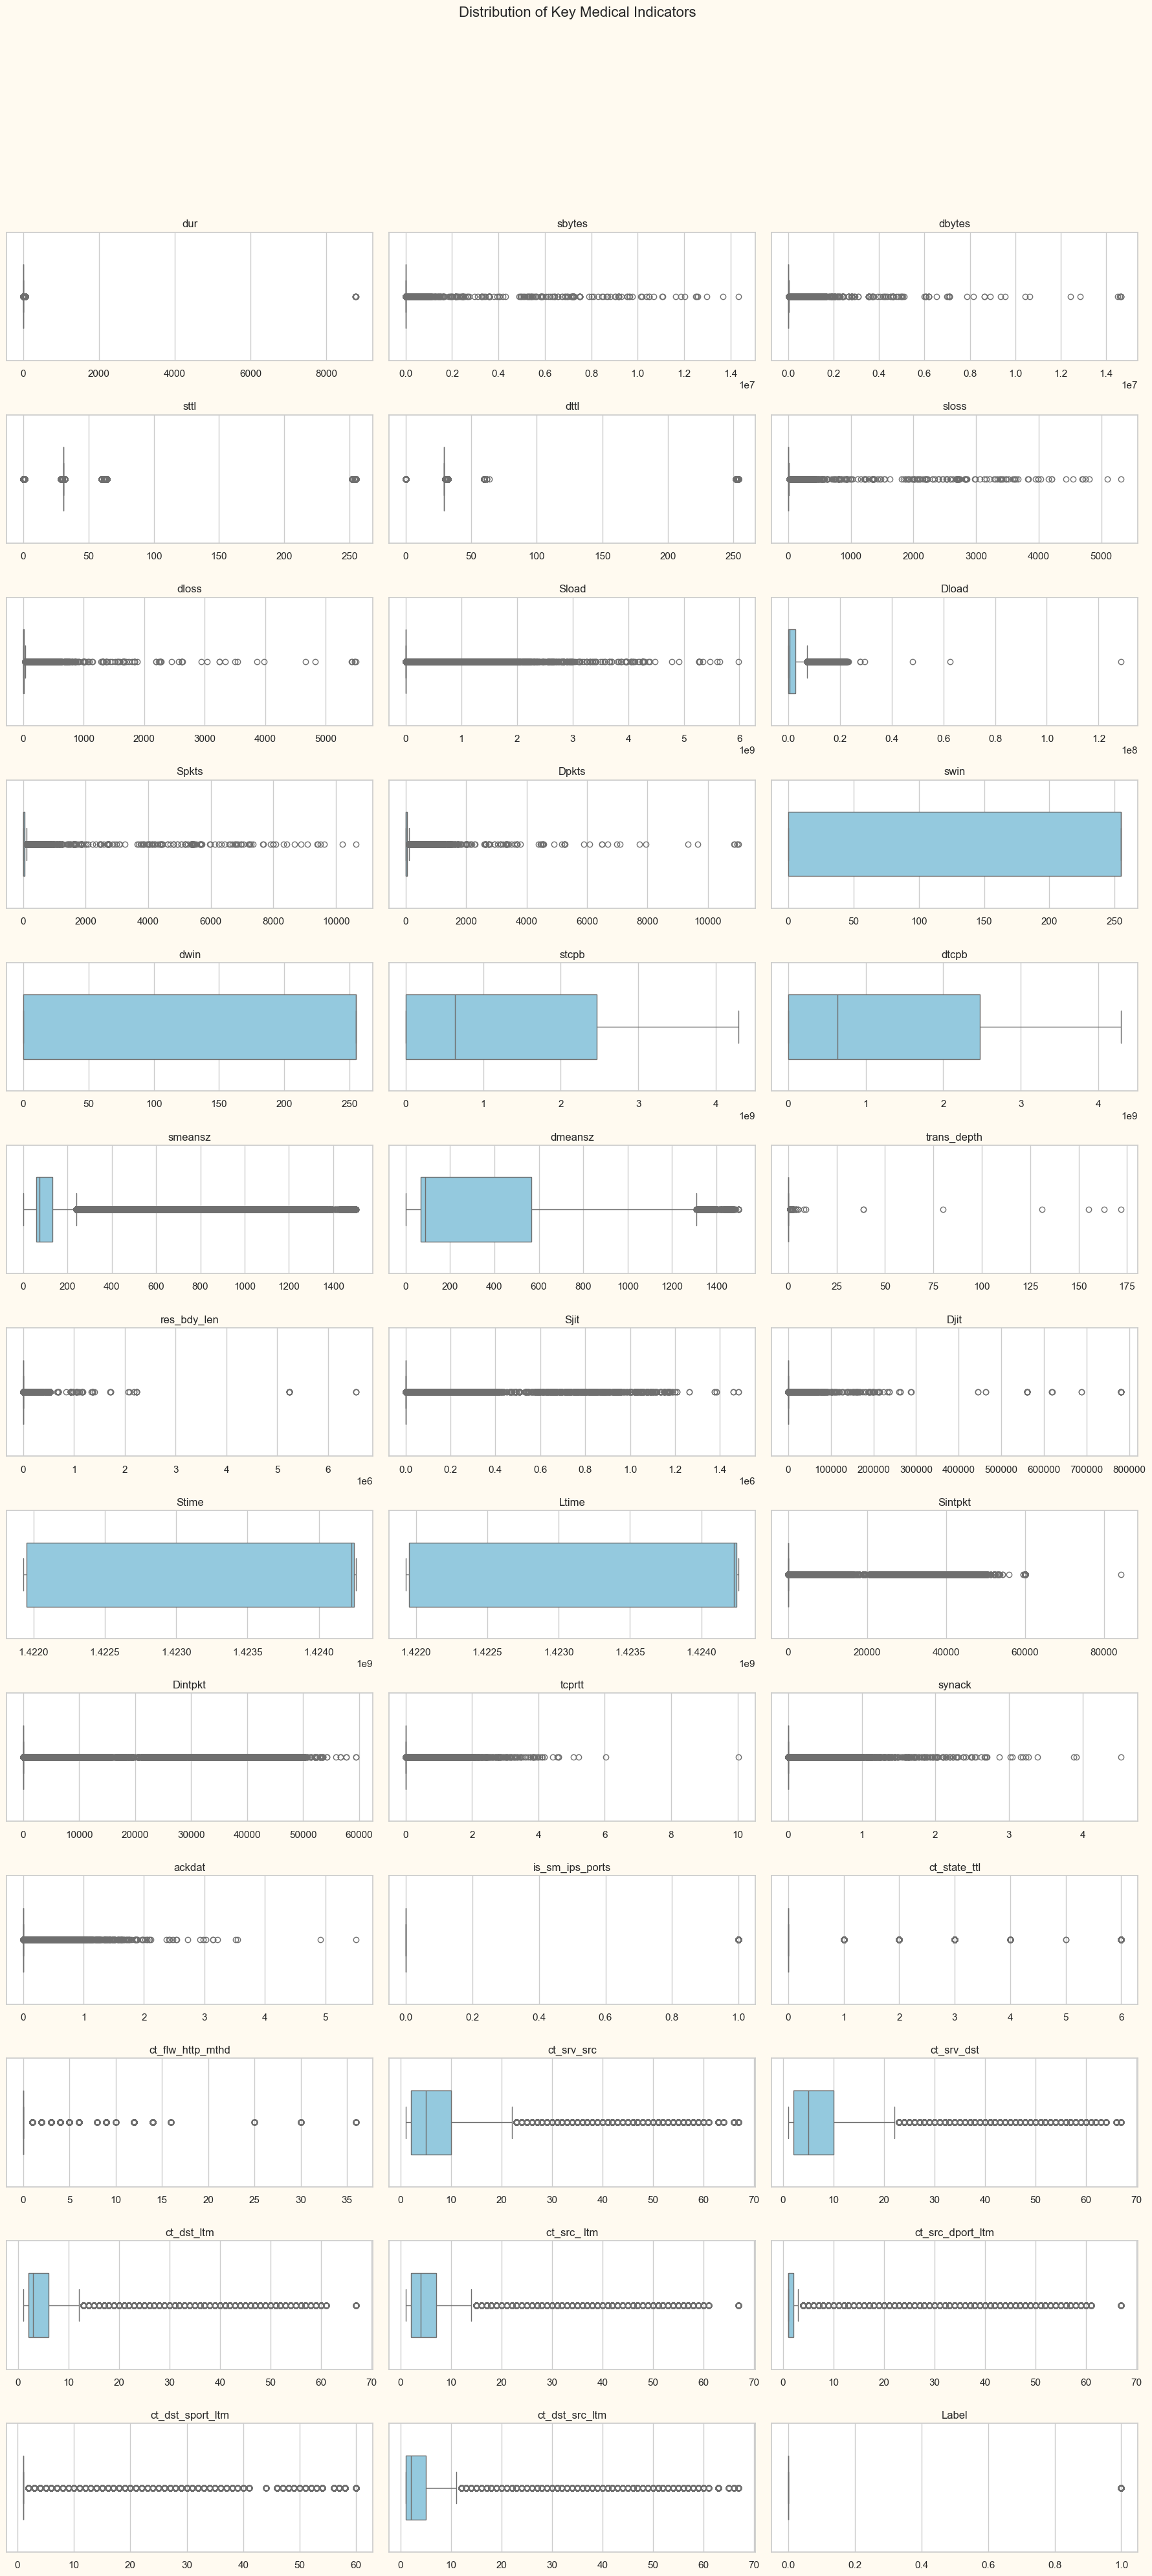

In [22]:
import math
import seaborn as sns
# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [23]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [24]:
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [25]:

# # Set the figure size and arrange plots horizontally in pairs
# numerical_features = train_df.select_dtypes(include=['number']).columns
# num_plots = len(numerical_features)
# num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
# fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # Loop through the selected columns and create histograms with density
# for i, col in enumerate(numerical_features):
#     sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram with Density for {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Density')
    
#     # Calculate skewness
#     skewness = skew(train_df[col].dropna())
#     axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# # Remove any empty subplots if the number of features is odd
# if num_plots % 2 != 0:
#     fig.delaxes(axes[-1])

# plt.tight_layout()
# plt.show()

1. |Skewness| < 1: The distribution is approximately symmetric.
2. |Skewness| > 1: The distribution is highly skewed.
3. |Skewness| between 1 and 2: Moderately skewed distribution.

In [26]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']
    
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
    
    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
    
    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

In [27]:
generate_features(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986.0,86.0,31.0,29.0,2.0,1.0,-,2.304490e+04,1.205512e+03,6.0,2.0,255,255,761934099,3893365633,164.0,43.0,0.0,0.0,19.124828,0.000000,1424224369,1424224369,0.468262,0.002000,0.000613,0.000483,0.000122,0.0,0.0,0.0,0,0,10.0,8.0,4.0,5.0,3.0,1.0,7.0,Not attacked,0.0,0,11.333333,2.000000,19.100436,19.124828,0.467327,0.000613,1072.0,8.0,2.425041e+04,19.124828,0.470262,0.001218,5916.0,172.0,4.407298e+05,0.000000e+00,114.748968,0.000000,207.0,-3131431534
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540.0,1644.0,31.0,29.0,4.0,4.0,-,3.675341e+04,3.952773e+04,16.0,18.0,255,255,734569334,2907227880,96.0,91.0,0.0,0.0,19.124828,35.106383,1424252728,1424252728,0.468262,0.414754,0.000596,0.000494,0.000102,0.0,0.0,0.0,0,0,14.0,6.0,8.0,12.0,1.0,1.0,6.0,Not attacked,0.0,0,0.936170,0.842105,0.929790,0.529680,0.330985,0.000596,3184.0,34.0,7.628114e+04,54.231211,0.883016,0.001192,24640.0,29592.0,7.029026e+05,1.387676e+06,305.997248,631.914894,187.0,-2172658546
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536.0,304.0,31.0,29.0,0.0,0.0,-,1.067800e+04,6.056179e+03,4.0,4.0,0,0,0,0,134.0,76.0,0.0,0.0,116.927883,123.543578,1421934312,1421934313,0.468262,0.414754,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,9.0,16.0,7.0,6.0,1.0,1.0,3.0,Not attacked,0.0,1,1.757377,0.800000,1.762867,0.938851,0.330985,0.000000,840.0,8.0,1.673418e+04,240.471461,0.883016,0.000000,2144.0,1216.0,1.248556e+06,7.482020e+05,467.711532,494.174312,210.0,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114.0,0.0,31.0,29.0,0.0,0.0,dns,5.893038e+05,0.000000e+00,2.0,0.0,0,0,0,0,57.0,0.0,0.0,0.0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,5.0,5.0,3.0,4.0,1.0,1.0,2.0,Generic,0.0,0,114.000000,2.000000,589303.750000,0.000000,0.009000,0.000000,114.0,2.0,5.893038e+05,0.000000,0.009000,0.000000,228.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,57.0,0
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146.0,178.0,31.0,29.0,0.0,0.0,dns,5.412419e+05,6.598702e+05,2.0,2.0,0,0,0,0,73.0,89.0,0.0,0.0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,2.0,2.0,5.0,4.0,1.0,1.0,1.0,Not attacked,0.0,0,0.815642,0.666667,0.820224,0.000000,0.008937,0.000000,324.0,4.0,1.201112e+06,0.000000,0.016000,0.000000,292.0,356.0,0.000000e+00,0.000000e+00,0.000000,0.000000,162.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920.0,4312.0,31.0,29.0,6.0,6.0,-,1.806134e+06,4.072423e+06,22.0,24.0,255,255,2097393639,4247267529,87.0,180.0,0.0,0.0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0.0,0.0,0.0,0,0,3.0,10.0,4.0,1.0,1.0,1.0,1.0,Not attacked,0.0,0,0.445166,0.880000,0.443503,1.100305,0.278432,0.000680,6232.0,46.0,5.878556e+06,45.317991,0.698648,0.001360,42240.0,103488.0,4.382585e+07,8.573664e+07,533.830198,505.271568,267.0,-2149873890
2540039,59.166.0.8,

In [28]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

In [29]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

In [30]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{' Fuzzers': 0, ' Fuzzers ': 1, ' Reconnaissance ': 2, ' Shellcode ': 3, 'Analysis': 4, 'Backdoor': 5, 'Backdoors': 6, 'DoS': 7, 'Exploits': 8, 'Generic': 9, 'Not attacked': 10, 'Reconnaissance': 11, 'Shellcode': 12, 'Worms': 13}


<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

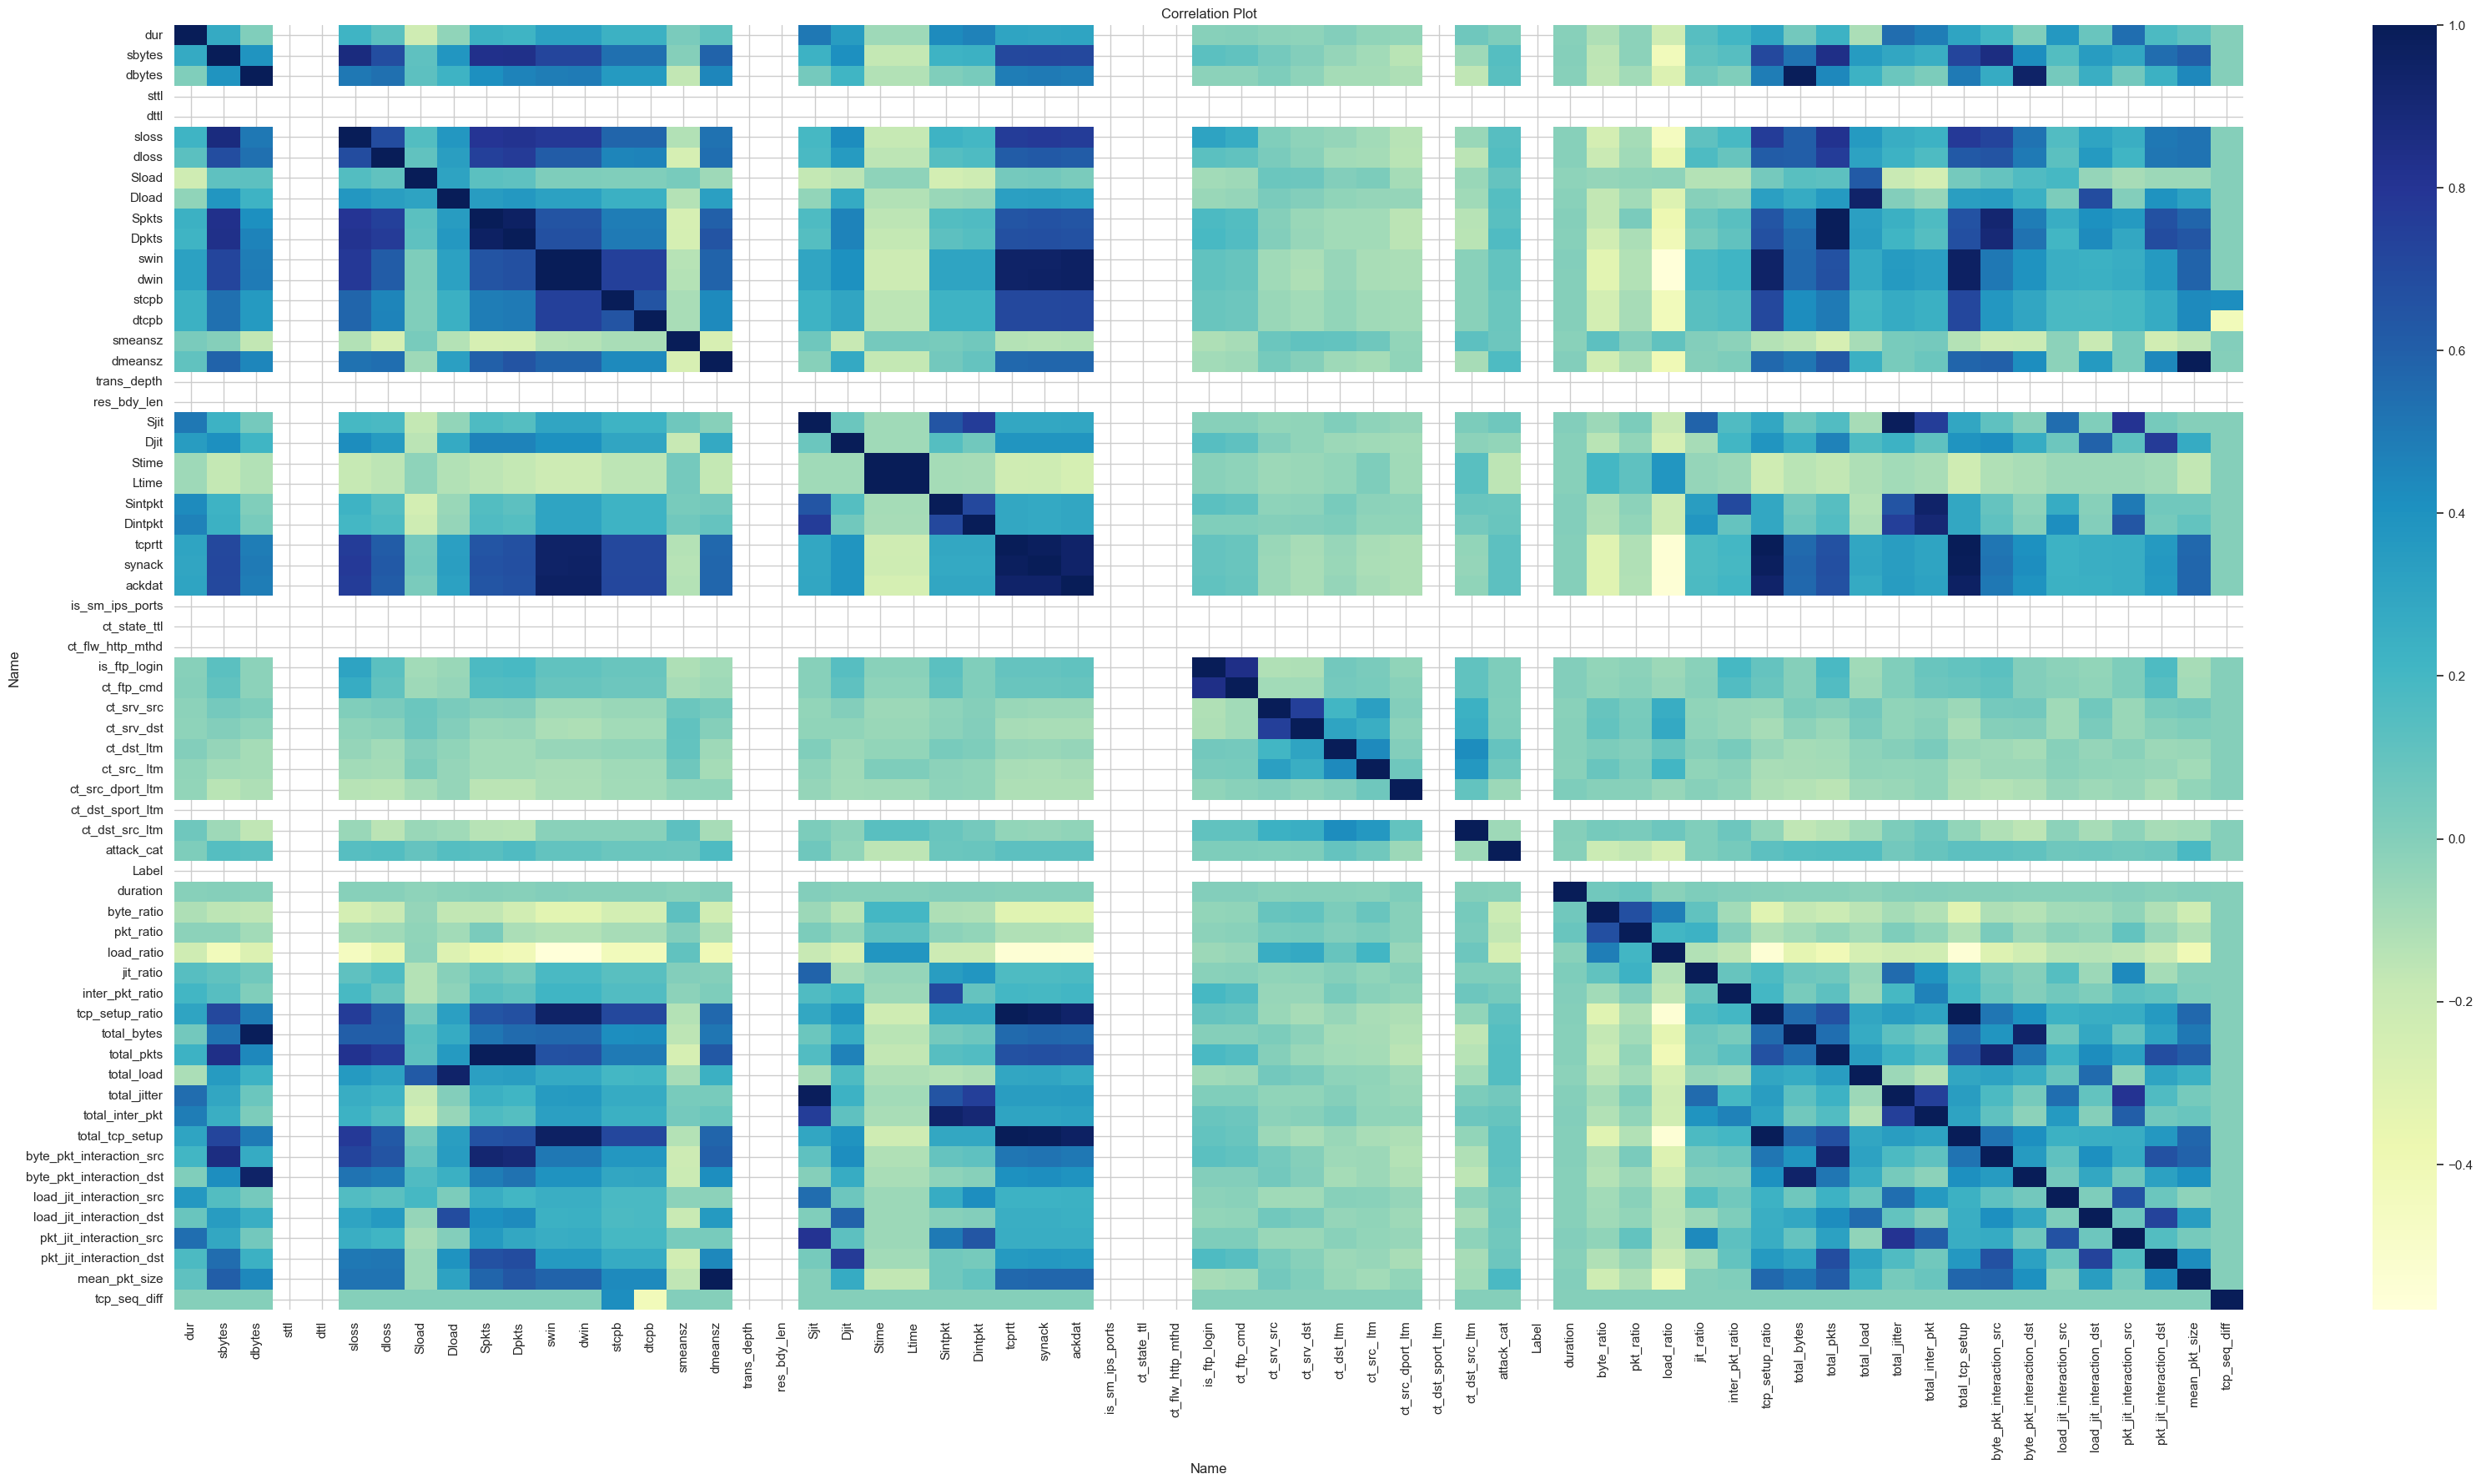

In [31]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [32]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
sbytes and sloss
sbytes and Spkts
sbytes and Dpkts
sbytes and total_pkts
sbytes and byte_pkt_interaction_src
dbytes and total_bytes
dbytes and byte_pkt_interaction_dst
sloss and Spkts
sloss and Dpkts
sloss and swin
sloss and dwin
sloss and tcprtt
sloss and synack
sloss and ackdat
sloss and tcp_setup_ratio
sloss and total_pkts
sloss and total_tcp_setup
dloss and Dpkts
dloss and total_pkts
Dload and total_load
Spkts and Dpkts
Spkts and total_pkts
Spkts and byte_pkt_interaction_src
Dpkts and total_pkts
Dpkts and byte_pkt_interaction_src
swin and dwin
swin and tcprtt
swin and synack
swin and ackdat
swin and tcp_setup_ratio
swin and total_tcp_setup
dwin and tcprtt
dwin and synack
dwin and ackdat
dwin and tcp_setup_ratio
dwin and total_tcp_setup
dmeansz and mean_pkt_size
Sjit and Dintpkt
Sjit and total_jitter
Sjit and total_inter_pkt
Sjit and pkt_jit_interaction_src
Djit and pkt_jit_interaction_dst
Stime and Ltime
Sintpkt and total_inter_pkt
Dintpkt and total_jitt

In [33]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'dloss', 'Sload', 'Dload',
       'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Sintpkt', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'attack_cat', 'Label', 'duration', 'byte_ratio',
       'pkt_ratio', 'load_ratio', 'jit_ratio', 'inter_pkt_ratio',
       'load_jit_interaction_src', 'load_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


In [34]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
10            2218760
9              215481
8               44525
1               19195
7               16353
2               12228
0                5051
4                2677
5                1795
11               1759
3                1288
6                 534
12                223
13                174
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
11            15000
12            15000
13            15000
Name: count, dtype: int64


In [36]:
x = x_resampled
y = y_resampled

In [37]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [38]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,byte_ratio,1.331895
1,sbytes,1.293210
2,smeansz,1.084770
3,Stime,1.035364
4,load_ratio,0.673852
5,dbytes,0.627461
6,ct_srv_src,0.607564
7,dmeansz,0.588323
8,pkt_ratio,0.568503
9,inter_pkt_ratio,0.534719


In [39]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['Label',
 'is_sm_ips_ports',
 'ct_flw_http_mthd',
 'res_bdy_len',
 'trans_depth',
 'ct_dst_sport_ltm',
 'ct_state_ttl',
 'dttl',
 'sttl']

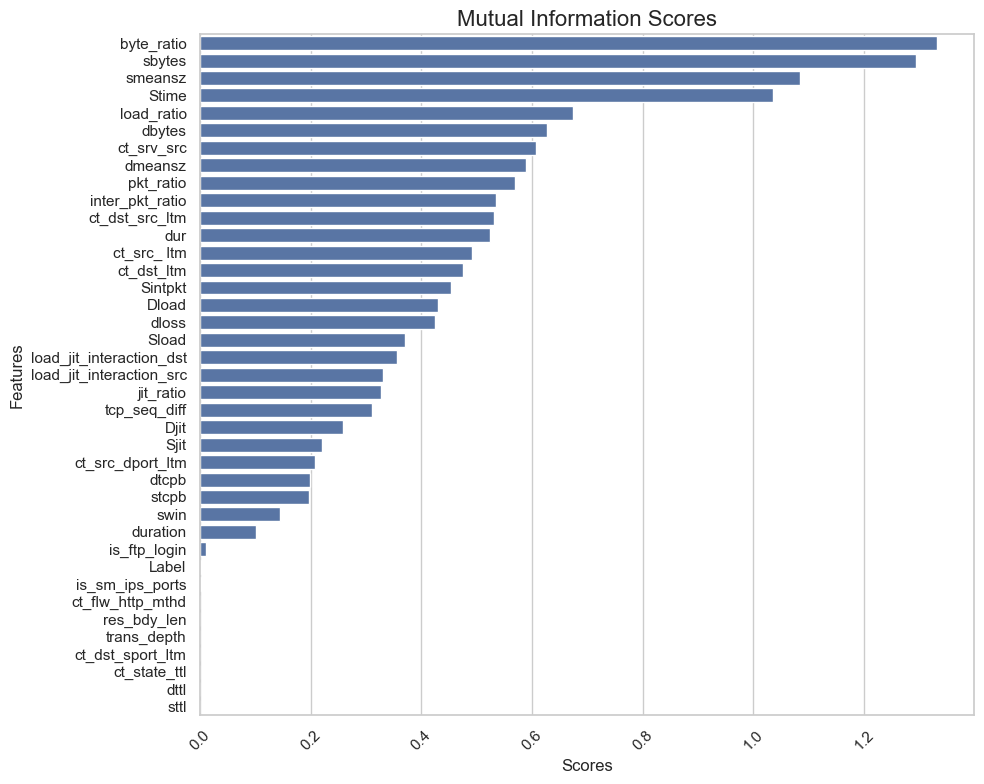

In [40]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [41]:
x.drop(low_score_feature_names,axis=1, inplace = True)

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


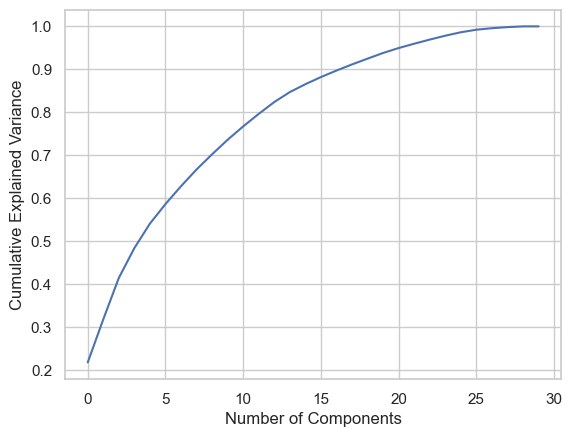

In [43]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [44]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [45]:
x_train_scaled.shape

(168000, 30)

In [57]:
y_train['attack_cat'].unique()

array([ 3, 10, 13,  2,  9,  6,  0,  4, 12,  7,  8,  5, 11,  1])

In [58]:
from tensorflow.keras.utils import to_categorical
# Convert label-encoded target variable to one-hot encoding
y_train_one_hot = to_categorical(y_train['attack_cat'], num_classes=14)
y_test_one_hot = to_categorical(y_test['attack_cat'], num_classes=14)

In [66]:
model = Sequential()

In [71]:
# Input layer
model.add(Dense(32, activation='relu', input_dim=30,
                kernel_regularizer=l2,
                kernel_initializer='glorot_uniform'))

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(18, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Output layer
model.add(Dense(14, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 18)             │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 18)             │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           143 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 18)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 18)             │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 12)             │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           143 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 18)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 18)             │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 12)             │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 14)             │           182 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,711 (18.40 KB)

 Trainable params: 4,531 (17.70 KB)

 Non-trainable params: 180 (720.00 B)

In [72]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [73]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

CALLBACKS = [early_stopping_cb]

history = model.fit(x_train_scaled,y_train_one_hot,epochs=100,validation_data = (x_test_scaled,y_test_one_hot),callbacks = CALLBACKS)

Epoch 1/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.3988 - loss: 2.6965 - val_accuracy: 0.6572 - val_loss: 1.2018
Epoch 2/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6407 - loss: 1.1971 - val_accuracy: 0.6590 - val_loss: 1.0583
Epoch 3/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6660 - loss: 1.0705 - val_accuracy: 0.6801 - val_loss: 1.0254
Epoch 4/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6739 - loss: 1.0400 - val_accuracy: 0.6863 - val_loss: 1.0473
Epoch 5/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6770 - loss: 1.0217 - val_accuracy: 0.5338 - val_loss: 1.4865
Epoch 6/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6792 - loss: 1.0061 - val_accuracy: 0.6397 - val_loss: 1.1306
Epoch 7/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6850 - loss: 0.9924 - val_accuracy: 0.2647 - val_loss: 3.0321
Epoch 8/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6871 -

In [74]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_one_hot)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6820 - loss: 1.0245
Test Loss: 1.0253794193267822
Test Accuracy: 0.680142879486084


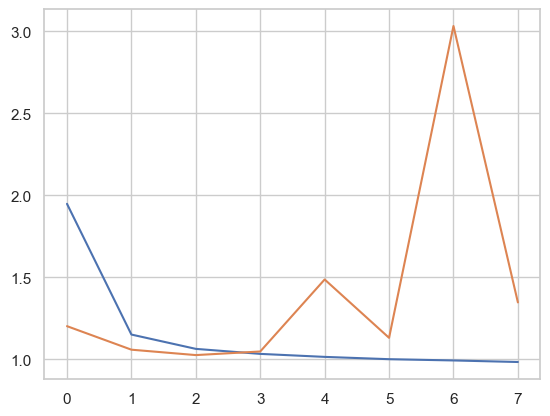

In [75]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

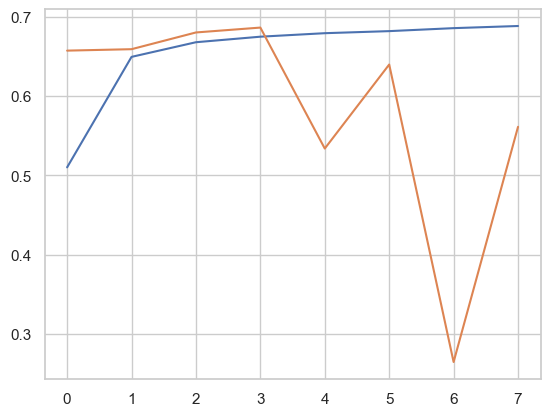

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<Axes: >

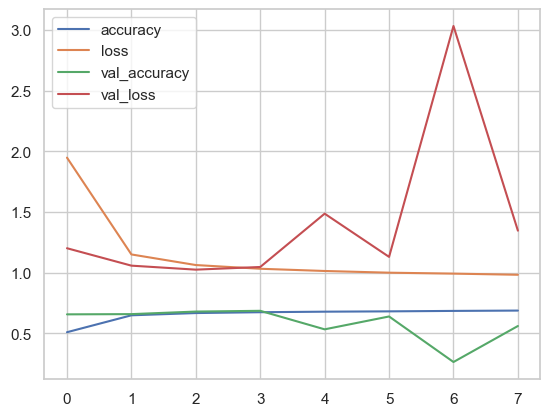

In [77]:
pd.DataFrame(history.history).plot()

In [83]:
def build_model(hp):
    model = keras.Sequential()
    num_of_layer = hp.Int('num_of_layer', min_value=1, max_value=5, step=1)
    model.add(keras.layers.InputLayer(input_shape=(30,)))
    for i in range(num_of_layer):
        model.add(keras.layers.Dense(
            units=hp.Int(f'unit_{i}_layer', min_value=20, max_value=40, step=2),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(keras.layers.Dropout(
            rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(14, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [84]:
tuner1 = keras_tuner.RandomSearch(hypermodel=build_model, objective='val_accuracy', max_trials=10, max_retries_per_trial=3,
                                directory = '/kaggle/working/',
                                 project_name='threat_detection_project')

Reloading Tuner from /kaggle/working/threat_detection_project\tuner0.json


In [85]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

In [86]:
tuner1.search(x_train_scaled, y_train_one_hot , epochs = 150, validation_data = (x_test_scaled, y_test_one_hot), callbacks = callbacks)

Trial 10 Complete [00h 01m 35s]
val_accuracy: 0.7029761672019958

Best val_accuracy So Far: 0.7369047403335571
Total elapsed time: 00h 22m 08s


In [87]:
best_param = tuner1.get_best_hyperparameters(num_trials=1)[0]

In [88]:
model1 = tuner1.hypermodel.build(best_param)

In [89]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 38)             │         1,178 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 38)             │           152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 14)             │           294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,484 (13.61 KB)

 Trainable params: 3,288 (12.84 KB)

 Non-trainable params: 196 (784.00 B)

In [90]:
history = model1.fit(x_train_scaled, y_train_one_hot ,epochs=100, validation_data=(x_test_scaled, y_test_one_hot))

Epoch 1/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4339 - loss: 1.6703 - val_accuracy: 0.6710 - val_loss: 0.9334
Epoch 2/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6249 - loss: 1.0824 - val_accuracy: 0.6867 - val_loss: 0.8660
Epoch 3/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6461 - loss: 1.0190 - val_accuracy: 0.6980 - val_loss: 0.8414
Epoch 4/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6598 - loss: 0.9841 - val_accuracy: 0.7069 - val_loss: 0.8192
Epoch 5/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6636 - loss: 0.9675 - val_accuracy: 0.7080 - val_loss: 0.8120
Epoch 6/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6692 - loss: 0.9513 - val_accuracy: 0.7080 - val_loss: 0.8060
Epoch 7/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6704 - loss: 0.9437 - val_accuracy: 0.7169 - val_loss: 0.7893
Epoch 8/100
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6729 - loss: 

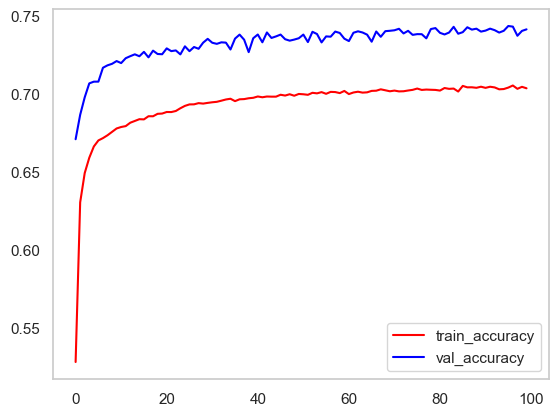

In [91]:
plt.plot(history.history['accuracy'], color = 'red',label = 'train_accuracy' )
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.legend()
plt.grid()
plt.plot()
plt.show()

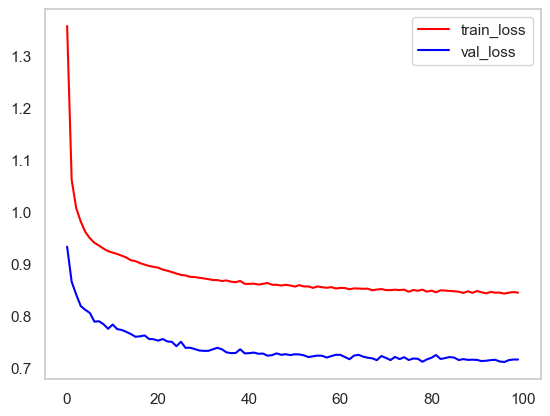

In [92]:
plt.plot(history.history['loss'], color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'val_loss')
plt.legend()
plt.grid()
plt.plot()
plt.show()